In [4]:
import warnings
warnings.filterwarnings('ignore')

#FOund this on stack overflow because i was getting warnings when i renamed columns even though the code worked


In [5]:
!pip install boxoffice_api  #https://pypi.org/project/boxoffice-api/  Instructions taken from this link on how to install and use the data
# ! found on stack overflow while looking for why it wouldnt run properly. The exclamation point treats the line as a command line argument. And allows the notebook to install the api and use it. 

from boxoffice_api import BoxOffice # retty sure this comes
import pandas as pd

box_office = BoxOffice(outputformat="DF") # Line literally from the link above



In [6]:
box_office_2019 = box_office.get_yearly(2019) #Printing THe boxoffice stuff for the year 2019. Usage found in api documentation. Link above.

box_office_2019

,Rank,Release,Gross,Theaters,Total Gross,Release Date,Distributor
0,1,Avengers: Endgame,"$858,373,000","4,662","$858,373,000",Apr 26,Walt Disney Studios Motion Pictures
1,2,The Lion King,"$543,638,043","4,802","$543,638,043",Jul 19,Walt Disney Studios Motion Pictures
2,3,Toy Story 4,"$434,038,008","4,575","$434,038,008",Jun 21,Walt Disney Studios Motion Pictures
3,4,Frozen II,"$430,144,682","4,440","$477,373,578",Nov 22,Walt Disney Studios Motion Pictures
4,5,Captain Marvel,"$426,829,839","4,310","$426,829,839",Mar 8,Walt Disney Studios Motion Pictures
...,...,...,...,...,...,...,...
195,196,Welcome to Marwen,"$2,405,625","1,911","$10,763,520",Dec 21,Universal Pictures
196,197,"My People, My Country","$2,356,683",83,"$2,356,683",Oct 1,CMC Pictures
197,198,Promare,"$2,287,950",701,"$2,529,324",Sep 17,GKIDS
198,199,Super 30,"$2,269,878",317,"$2,269,878",Jul 12,Reliance Big Pictures


In [7]:
weekly_sales_2019 = []
for i in range(17, 38):
    weekly_sales_2019.append(box_office.get_weekly(year=2019, week=i))  #Grabbing a list of the first 3 weeks from the release of Endgame, FOund the dae/week number on google



week_1_df = pd.DataFrame(weekly_sales_2019[0]) #Grab first element to get week 1 data same for first 5
week_2_df = pd.DataFrame(weekly_sales_2019[1])
week_3_df = pd.DataFrame(weekly_sales_2019[2])
week_4_df = pd.DataFrame(weekly_sales_2019[3])
week_5_df = pd.DataFrame(weekly_sales_2019[4])

week_1_df.head() # Printing to show the layout of the DataFrame


,Rank,LW,Release,Gross,%± LW,Theaters,Change,Average,Total Gross,Weeks,Distributor
0,1,-,Avengers: Endgame,"$473,894,638",-,"4,662",-,"$101,650","$473,894,638",1,Walt Disney Studios Motion Pictures
1,2,4,Captain Marvel,"$10,962,971",-24.9%,"2,435",-218,"$4,502","$416,492,018",8,Walt Disney Studios Motion Pictures
2,3,1,The Curse of La Llorona,"$10,815,702",-68%,"3,372",-,"$3,207","$44,600,003",2,Warner Bros.
3,4,3,Breakthrough,"$9,466,282",-41.9%,"2,913",+89,"$3,249","$29,276,512",3,Twentieth Century Fox
4,5,2,Shazam!,"$7,114,063",-67.2%,"3,631",-552,"$1,959","$132,743,790",4,Warner Bros.


In [8]:
merged_df = pd.concat([week_1_df, week_2_df, week_3_df, week_4_df, week_5_df])# merge the weekly DataFrames into one. [] puts the 5 into a list for syntax

avengers_opening_five = merged_df[merged_df["Release"] == "Avengers: Endgame"]# Filter for the movie 



avengers_opening_five

,Rank,LW,Release,Gross,%± LW,Theaters,Change,Average,Total Gross,Weeks,Distributor
0,1,-,Avengers: Endgame,"$473,894,638",-,"4,662",-,"$101,650","$473,894,638",1,Walt Disney Studios Motion Pictures
0,1,1,Avengers: Endgame,"$186,551,101",-60.6%,"4,662",-,"$40,015","$660,445,739",2,Walt Disney Studios Motion Pictures
0,1,1,Avengers: Endgame,"$80,949,131",-56.6%,"4,662",-,"$17,363","$741,394,870",3,Walt Disney Studios Motion Pictures
1,2,1,Avengers: Endgame,"$39,936,866",-50.7%,"4,220",-442,"$9,463","$781,331,736",4,Walt Disney Studios Motion Pictures
2,3,2,Avengers: Endgame,"$26,357,048",-34%,"3,810",-410,"$6,917","$807,688,784",5,Walt Disney Studios Motion Pictures


In [9]:
print(avengers_opening_five.columns) #Print the columns so i can accurately change the name for future use. The +- symbol was hard to work with so i changed it.

avengers_opening_five.rename(columns={'%± LW': 'Weekly Change %'}, inplace=True) #.rename renames a column. Inplaace makes sure it doesnt create a new df, instead it makes the changes to the current instance of this df object.

print(avengers_opening_five.columns) # Renaming % change column for future clarity


Index(['Rank', 'LW', 'Release', 'Gross', '%± LW', 'Theaters', 'Change',
       'Average', 'Total Gross', 'Weeks', 'Distributor'],
      dtype='object')
Index(['Rank', 'LW', 'Release', 'Gross', 'Weekly Change %', 'Theaters',
       'Change', 'Average', 'Total Gross', 'Weeks', 'Distributor'],
      dtype='object')


In [10]:
# clean Average column
avengers_opening_five["Average"] = avengers_opening_five["Average"].str.replace('$', '') #Replace cash with a blank
avengers_opening_five["Average"] = avengers_opening_five["Average"].str.replace(',', '') #replace commas with a blank
avengers_opening_five["Average"] = avengers_opening_five["Average"].astype(int) #convert it into a number

# clean Theaters column
avengers_opening_five["Theaters"] = avengers_opening_five["Theaters"].str.replace('$', '')
avengers_opening_five["Theaters"] = avengers_opening_five["Theaters"].str.replace(',', '')
avengers_opening_five["Theaters"] = avengers_opening_five["Theaters"].astype(int)

# clean Gross column
avengers_opening_five["Gross"] = avengers_opening_five["Gross"].str.replace('$', '')
avengers_opening_five["Gross"] = avengers_opening_five["Gross"].str.replace(',', '')
avengers_opening_five["Gross"] = avengers_opening_five["Gross"].astype(int)

# clean Total Gross column
avengers_opening_five["Total Gross"] = avengers_opening_five["Total Gross"].str.replace('$', '')
avengers_opening_five["Total Gross"] = avengers_opening_five["Total Gross"].str.replace(',', '')
avengers_opening_five["Total Gross"] = avengers_opening_five["Total Gross"].astype(int)


#clean Weekly Change % column
avengers_opening_five["Weekly Change %"] = avengers_opening_five["Weekly Change %"].str.replace('$', '')
avengers_opening_five["Weekly Change %"] = avengers_opening_five["Weekly Change %"].str.replace(',', '')
avengers_opening_five["Weekly Change %"] = avengers_opening_five["Weekly Change %"].str.replace('%', '')


# Astype(float) didnt wok probably because of the negative symbol which is needed and i cant just replace it with a blank, so i found another method which was pd.to_numeric, which can deal with '-' 
# errors coerce was a way to handle missing values.it replaces them with NaN

avengers_opening_five["Weekly Change %"] = pd.to_numeric(avengers_opening_five["Weekly Change %"], errors='coerce')  
avengers_opening_five["Weekly Change %"].fillna(0, inplace=True) #Replace any instances of NaN data with 0


avengers_opening_five.head()

,Rank,LW,Release,Gross,Weekly Change %,Theaters,Change,Average,Total Gross,Weeks,Distributor
0,1,-,Avengers: Endgame,473894638,0.0,4662,-,101650,473894638,1,Walt Disney Studios Motion Pictures
0,1,1,Avengers: Endgame,186551101,-60.6,4662,-,40015,660445739,2,Walt Disney Studios Motion Pictures
0,1,1,Avengers: Endgame,80949131,-56.6,4662,-,17363,741394870,3,Walt Disney Studios Motion Pictures
1,2,1,Avengers: Endgame,39936866,-50.7,4220,-442,9463,781331736,4,Walt Disney Studios Motion Pictures
2,3,2,Avengers: Endgame,26357048,-34.0,3810,-410,6917,807688784,5,Walt Disney Studios Motion Pictures


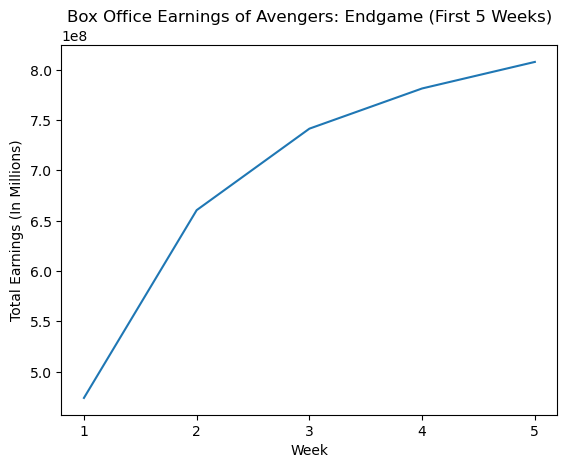

In [11]:
import matplotlib.pyplot as plt

plt.plot(avengers_opening_five['Weeks'], avengers_opening_five['Total Gross'])

plt.title('Box Office Earnings of Avengers: Endgame (First 5 Weeks)')
plt.xlabel('Week')
plt.ylabel('Total Earnings (In Millions)')

plt.show()


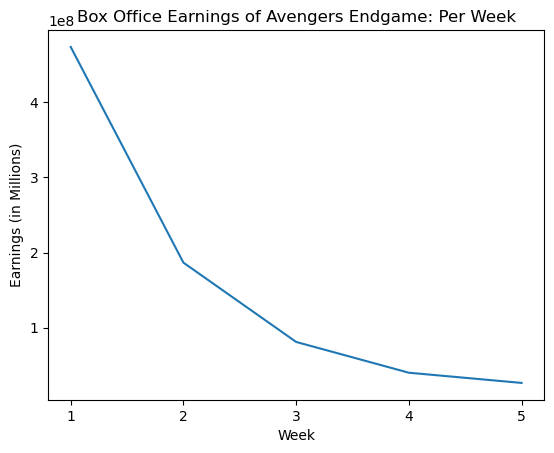

In [12]:
plt.plot(avengers_opening_five['Weeks'], avengers_opening_five['Gross'])

plt.title('Box Office Earnings of Avengers Endgame: Per Week')
plt.xlabel('Week')
plt.ylabel('Earnings (in Millions)')

plt.show()


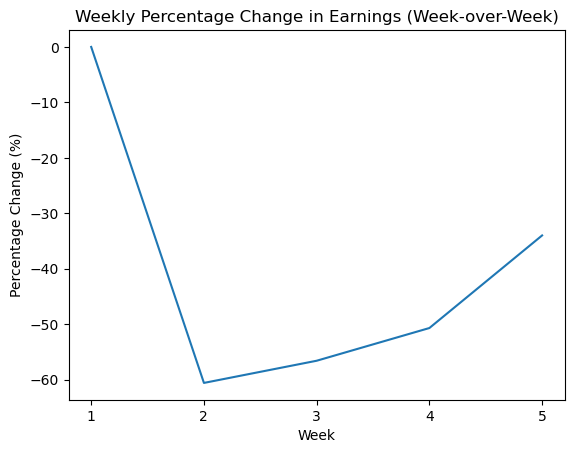

In [13]:
plt.plot(avengers_opening_five['Weeks'], avengers_opening_five["Weekly Change %"])

plt.title('Weekly Percentage Change in Earnings (Week-over-Week)')
plt.xlabel('Week')
plt.ylabel('Percentage Change (%)')

plt.show()

# 5 MONTH ANAYSIS 


In [14]:

def cleaner(week): # Takes in each index of the weekly data list and processes them
     
    df = week.copy() # I dont want to mess with the week i sent thru so i use a copy
    
    df = df[df["Release"].isin(["Avengers: Endgame"])] #FIlters out any rows that arent Avengers Endgame, Technically only leaves 1 row
    
    if df.empty: # Returns the df if its empty, this will also be checked before the concat in the loop.
        return df 
    
    df.rename(columns={'%± LW': 'Weekly Change %'}, inplace=True) # Change column name for typing ease


    # clean Average column
    df["Average"] = df["Average"].str.replace('$', '') #Replace cash with a blank
    df["Average"] = df["Average"].str.replace(',', '') #replace commas with a blank
    df["Average"] = df["Average"].astype(int) #convert it into a number

    # clean Theaters column
    df["Theaters"] = df["Theaters"].str.replace('$', '')
    df["Theaters"] = df["Theaters"].str.replace(',', '')
    df["Theaters"] = df["Theaters"].astype(int)

    # clean Gross column
    df["Gross"] = df["Gross"].str.replace('$', '')
    df["Gross"] = df["Gross"].str.replace(',', '')
    df["Gross"] = df["Gross"].astype(int)

    # clean Total Gross column
    df["Total Gross"] = df["Total Gross"].str.replace('$', '')
    df["Total Gross"] = df["Total Gross"].str.replace(',', '')
    df["Total Gross"] = df["Total Gross"].astype(int)


    #clean Weekly Change % column
    df["Weekly Change %"] = df["Weekly Change %"].str.replace('$', '')
    df["Weekly Change %"] = df["Weekly Change %"].str.replace(',', '')
    df["Weekly Change %"] = df["Weekly Change %"].str.replace('%', '')


    # Astype(float) didnt wok probably because of the negative symbol which is needed and i cant just replace it with a blank, so i found another method which was pd.to_numeric, which can deal with '-' 
    # errors coerce was a way to handle missing values.it replaces them with NaN

    df["Weekly Change %"] = pd.to_numeric(df["Weekly Change %"], errors='coerce')  
    df["Weekly Change %"].fillna(0, inplace=True) #Replace any instances of NaN data with 0


    return df  
    
    

In [15]:
five_month_df = avengers_opening_five # I already had these saved and processed

for week in weekly_sales_2019[5:]:# Goes thru the elements in the year exept for the first 5 weeks.
    new_df = cleaner(week)
    if new_df.empty:
        continue
    five_month_df = pd.concat([five_month_df, new_df])

    
five_month_df

,Rank,LW,Release,Gross,Weekly Change %,Theaters,Change,Average,Total Gross,Weeks,Distributor
0,1,-,Avengers: Endgame,473894638,0.0,4662,-,101650,473894638,1,Walt Disney Studios Motion Pictures
0,1,1,Avengers: Endgame,186551101,-60.6,4662,-,40015,660445739,2,Walt Disney Studios Motion Pictures
0,1,1,Avengers: Endgame,80949131,-56.6,4662,-,17363,741394870,3,Walt Disney Studios Motion Pictures
1,2,1,Avengers: Endgame,39936866,-50.7,4220,-442,9463,781331736,4,Walt Disney Studios Motion Pictures
2,3,2,Avengers: Endgame,26357048,-34.0,3810,-410,6917,807688784,5,Walt Disney Studios Motion Pictures
5,6,3,Avengers: Endgame,11877156,-54.9,3105,-705,3825,819565940,6,Walt Disney Studios Motion Pictures
7,8,6,Avengers: Endgame,7408419,-37.6,2121,-984,3492,826974359,7,Walt Disney Studios Motion Pictures
10,11,8,Avengers: Endgame,5634607,-23.9,1450,-671,3885,832608966,8,Walt Disney Studios Motion Pictures
13,14,11,Avengers: Endgame,3172195,-43.7,985,-465,3220,835781161,9,Walt Disney Studios Motion Pictures
7,8,14,Avengers: Endgame,8981672,183.1,1985,"+1,000",4524,844762833,10,Walt Disney Studios Motion Pictures


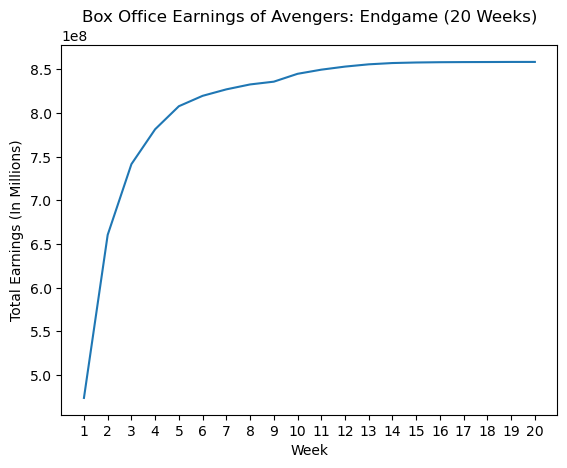

In [16]:
plt.plot(five_month_df['Weeks'], five_month_df['Total Gross'])

plt.title('Box Office Earnings of Avengers: Endgame (20 Weeks)')
plt.xlabel('Week')
plt.ylabel('Total Earnings (In Millions)')

plt.show()


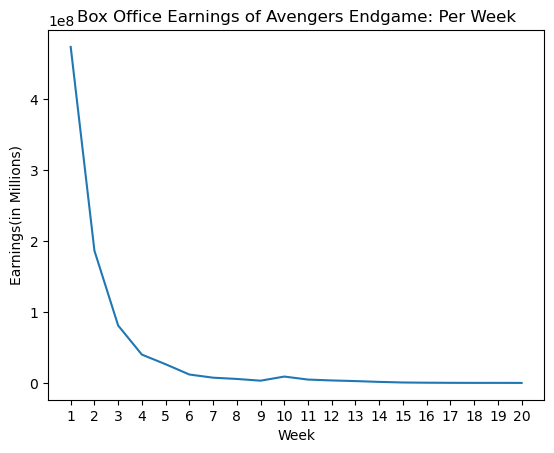

In [17]:
plt.plot(five_month_df['Weeks'], five_month_df['Gross'])

plt.title('Box Office Earnings of Avengers Endgame: Per Week')
plt.xlabel('Week')
plt.ylabel('Earnings(in Millions)')

plt.show()


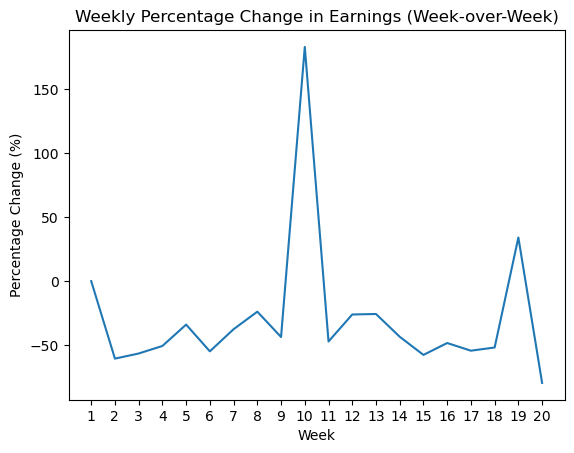

In [18]:
plt.plot(five_month_df['Weeks'], five_month_df["Weekly Change %"])

plt.title('Weekly Percentage Change in Earnings (Week-over-Week)')
plt.xlabel('Week')
plt.ylabel('Percentage Change (%)')

plt.show()